In [3]:
import numpy as np
data=np.load("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000603527582775543/band_08.npy")
#Loading a .npy file 
data.shape #Image Size 256*256 (Height*Width) #8 Number of Images in the frame 

(256, 256, 8)

In [7]:
band15=np.load("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000603527582775543/band_15.npy")
band14=np.load("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000603527582775543/band_14.npy")
band11=np.load("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000603527582775543/band_11.npy")

In [8]:
r_bounds=(-4,2) #Refer RGB_Recipies PDF Page 7 
g_bounds=(-4,5)
b_bounds=(243,303)

In [28]:
def normalise(x,bounds):
    return (x-bounds[0])/(bounds[1]-bounds[0]) #Refer formula in PDF Pg no 3
    #Converting values in range [0,1]
r = normalise(band15 - band14, r_bounds)
g = normalise(band14 - band11, g_bounds)
b = normalise(band14, b_bounds)  
print(r.shape)

(256, 256, 8)


In [27]:
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1) #np.clip is used to limit the values of array elements in a given range
print(false_color.shape)
img=false_color[...,3] # .... means "as many as needed"
img.shape

(256, 256, 3, 8)


(256, 256, 3)

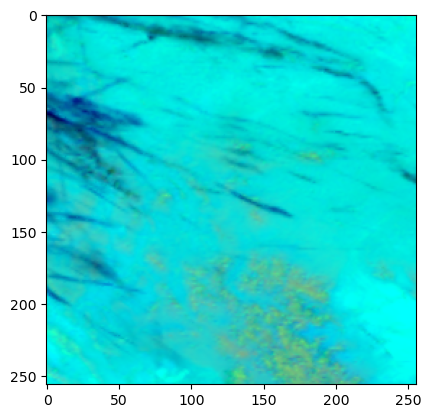

In [26]:
import matplotlib.pyplot as plt
plt.imshow(img)

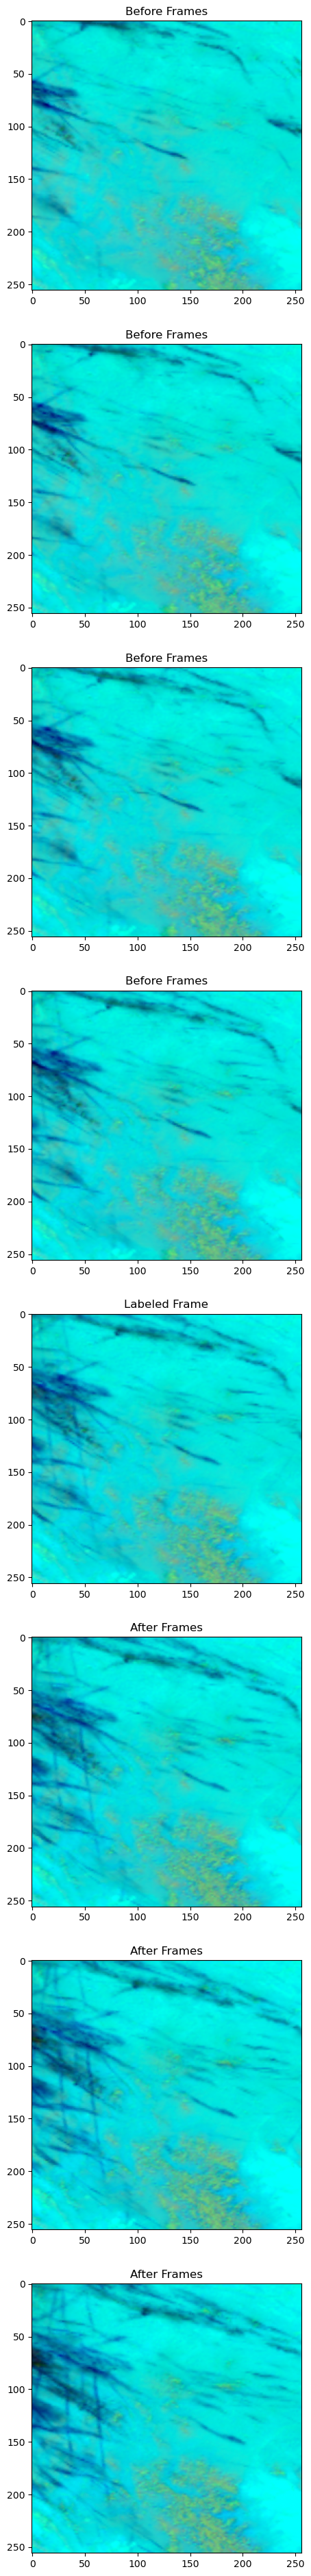

In [35]:
plt.figure(figsize=(6,48))

for i in range(1,9):
    ax=plt.subplot(8,1,i)
    
        
    img=false_color[...,i-1]
    ax.imshow(img)
    if(i==5):
        ax.set_title("Labeled Frame")
    if(i<5):
        ax.set_title("Before Frames")
    if(i>5):
        ax.set_title("After Frames")